In [1]:
%load_ext watermark
%watermark

Last updated: 2021-05-22T19:17:34.579415+01:00

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.23.1

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.4.0-73-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")

df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
%matplotlib notebook

In [4]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


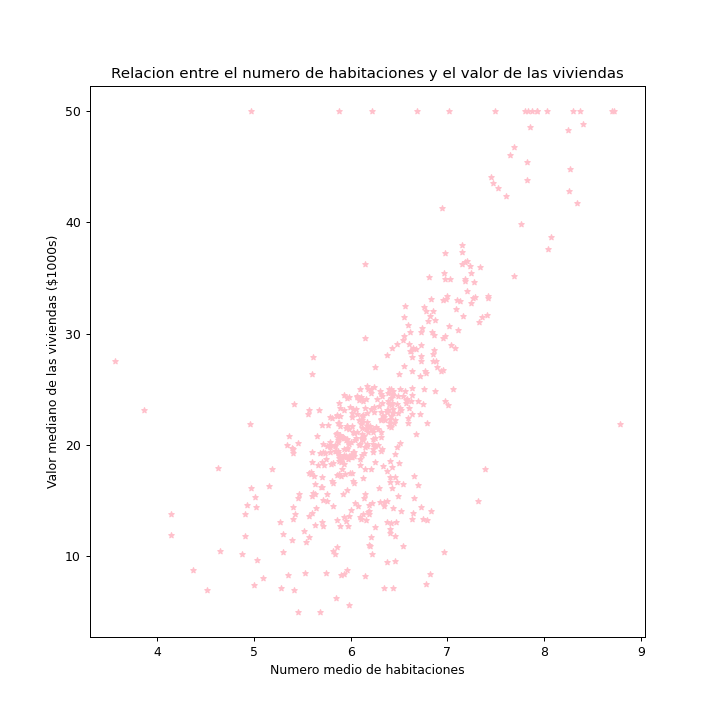

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [5]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink", figsize=(8,8))

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [6]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8,8)

<IPython.core.display.Javascript object>


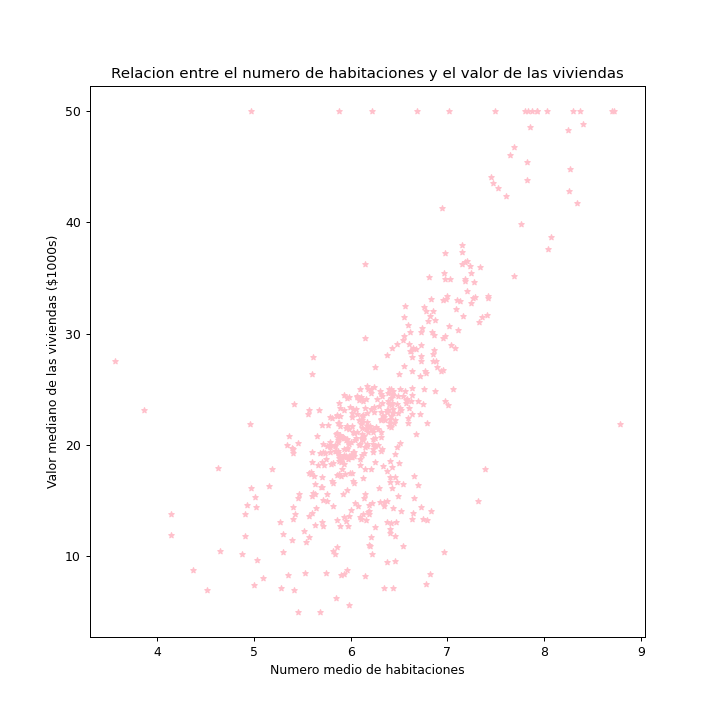

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [7]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [9]:
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>


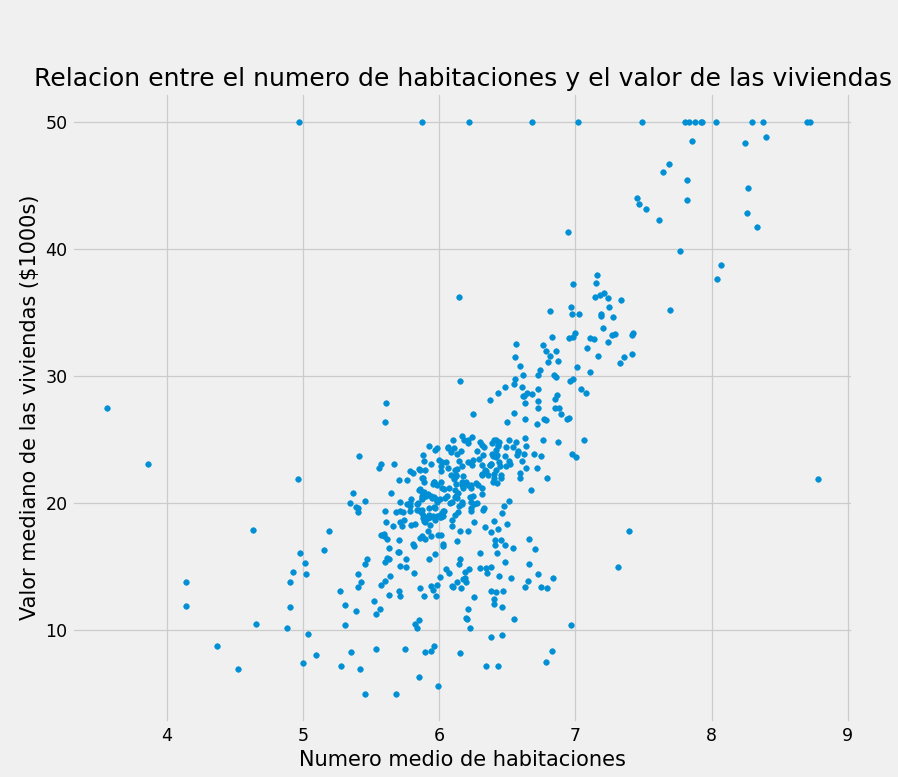

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [10]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [11]:
from ipywidgets import interact

In [12]:
@interact(col1=df.columns.tolist())
def grafico_variable(col1):
    df.plot.scatter(x=col1, y="VALOR_MEDIANO")
    plt.title("{} vs VALOR_MEDIANO".format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


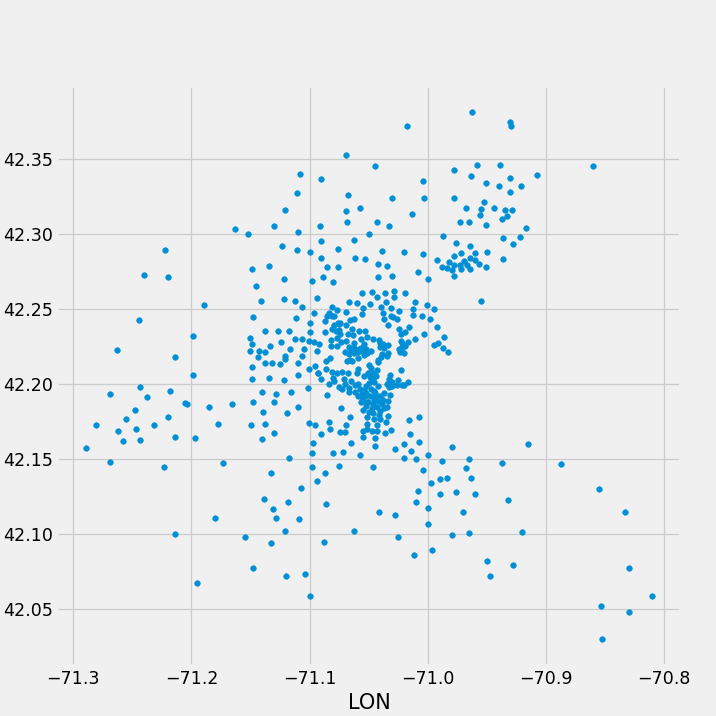

<AxesSubplot:xlabel='LON', ylabel='LAT'>

In [13]:
df.plot.scatter(x="LON", y="LAT")

In [15]:
%matplotlib inline

<AxesSubplot:ylabel='Density'>

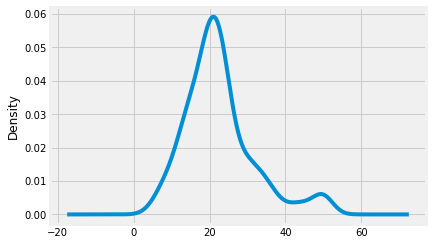

In [16]:
df.VALOR_MEDIANO.plot.kde()

In [17]:
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)
primer_quintil

15.3

In [18]:
cuarto_quintil = df.VALOR_MEDIANO.quantile(0.8)
cuarto_quintil

28.2

In [19]:
import seaborn as sns

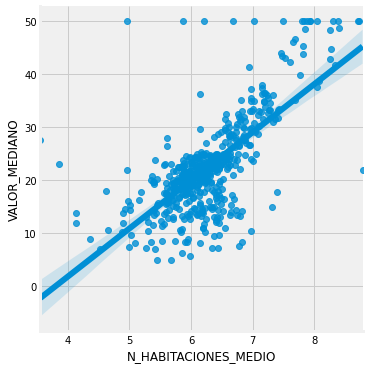

In [20]:
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", data=df)

In [34]:
%matplotlib inline

<AxesSubplot:>

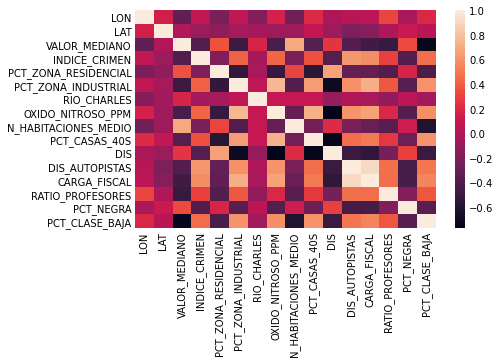

In [21]:
sns.heatmap(df.corr())

In [22]:
import bokeh.plotting as bk

bk.output_notebook()

Loading BokehJS ...

In [23]:
df.INDICE_CRIMEN

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: INDICE_CRIMEN, Length: 506, dtype: float64

In [24]:
df["CRIMEN_QUINTIL"] = pd.qcut(df.INDICE_CRIMEN, 5)

In [25]:
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]],
              closed='right',
              dtype='interval[float64]')

In [26]:
from bokeh.palettes import brewer

colors = brewer["Spectral"][len(df.CRIMEN_QUINTIL.unique())]
colors

('#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c')

<div class="alert alert-block alert-warning">
<b>Actualizacion Mayo 2021:</b> "legend" se ha renombrado a "legend_label".
</div>

In [28]:
p = bk.figure(
plot_width=600,
    plot_height=600,
    title="Habitaciones vs Valor vivienda vs crimen"
)

for i, quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories):
    df_q = df[df.CRIMEN_QUINTIL==quintil]
    p.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO, color=colors[i],
             legend_label="({}-{})".format(quintil.left, quintil.right)
             )
    
bk.show(p);

<AxesSubplot:ylabel='Frequency'>

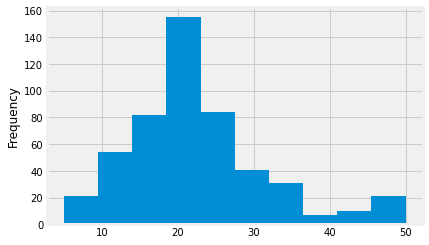

In [29]:
df.VALOR_MEDIANO.plot.hist()

In [30]:
import numpy as np

hist, edges = np.histogram(df.VALOR_MEDIANO, bins=20)

In [31]:
hist

array([ 9, 12, 18, 36, 41, 41, 84, 71, 72, 12, 23, 18, 17, 14,  6,  1,  5,
        5,  2, 19])

In [47]:
edges

array([  5.  ,   7.25,   9.5 ,  11.75,  14.  ,  16.25,  18.5 ,  20.75,
        23.  ,  25.25,  27.5 ,  29.75,  32.  ,  34.25,  36.5 ,  38.75,
        41.  ,  43.25,  45.5 ,  47.75,  50.  ])

In [32]:
p1 = bk.figure(title="Histograma valor viviendas", tools="save,hover", background_fill_color="#E8DDCB")



p1.quad(top=hist,bottom=0, left=edges[:-1], right=edges[1:], fill_color="#026560")

bk.show(p1)

In [33]:
from altair import Chart, Color, Scale

<div class="alert alert-block alert-warning">
<b>Actualizacion Mayo 2021:</b> Altair ha cambiado como interpreta los  datos tipo interval (como cuantiles)
    Ahora hay que convertir la columna en string (texto) antes de usarla para aplicar el color
</div>

In [67]:
# convertimos la columna de cuantiles en texto
df['CRIMEN_QUINTIL_STR'] = df.CRIMEN_QUINTIL.astype(str)

In [71]:
chart = Chart(df[['N_HABITACIONES_MEDIO','VALOR_MEDIANO','CRIMEN_QUINTIL_STR']])

scale = Scale(range=['#996666', '#b34d4d', '#cc3333','#e61919','#ff0000'], type='ordinal')

chart.mark_point().encode(
    x="N_HABITACIONES_MEDIO",
    y="VALOR_MEDIANO",
    color=Color("CRIMEN_QUINTIL_STR", scale=scale)

)

alt.Chart(...)